# Introduction

Competitive intelligence is the result of a company’s efforts to gather and analyze information about its industry, business environment, competitors, and competitive products and services. The information-gathering and analysis process can help a company develop its strategy or identify competitive gaps.

This analysis will investigate the estimated diner retention rate for a competitor in the food ordering and delivery industry. The raw data provided is in cohort form, which displays the rate at which diners of a specific cohort return and transact with the competitor's platform.

Note: The data provided in this task was converted to a CSV file prior to the analysis.

# Initial Data Exploration and Cleaning

In [35]:
# Import Python libraries required for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the CSV data
retention = pd.read_csv('retention.csv')

# Display a subset of data
retention.iloc[:5,:10]

,New Diner Cohort,0,1,2,3,4,5,6,7,8
0,2018-01,100%,35%,33%,29%,26%,26%,25%,26%,24%
1,2018-02,100%,38%,30%,27%,26%,25%,25%,26%,23%
2,2018-03,100%,33%,28%,26%,26%,25%,24%,23%,24%
3,2018-04,100%,33%,26%,25%,24%,24%,23%,23%,23%
4,2018-05,100%,34%,29%,26%,25%,26%,26%,24%,23%


Upon inspection of the data, we see that the rates are displayed as string characters. We will need to convert the individual elements into numeric datatypes and remove the "%" character so that numeric analysis can be accomplished. Additionally, we will set the `New Diner Cohort` column as the row index.

In [36]:
# Set the monthly cohort as the row index
retention = retention.set_index('New Diner Cohort')

# Remove the % character and convert data to a numeric datatype
retention = retention.apply(lambda x: x.str.replace('%','').astype(float))

# Display a subset of data
retention.iloc[:5,:10]

,0,1,2,3,4,5,6,7,8,9
New Diner Cohort,,,,,,,,,,
2018-01,100.0,35.0,33.0,29.0,26.0,26.0,25.0,26.0,24.0,24.0
2018-02,100.0,38.0,30.0,27.0,26.0,25.0,25.0,26.0,23.0,24.0
2018-03,100.0,33.0,28.0,26.0,26.0,25.0,24.0,23.0,24.0,23.0
2018-04,100.0,33.0,26.0,25.0,24.0,24.0,23.0,23.0,23.0,22.0
2018-05,100.0,34.0,29.0,26.0,25.0,26.0,26.0,24.0,23.0,22.0


The data is now in a more usable form.

Initial observations of the data:

* There are 31 total monthly cohorts, spanning from January 2018 to July 2020.
* Retention is tracked monthly for each cohort spanning that time frame. 
* The data is not easily readable. Creating improved visualizations will help to identify any trends.

# Visualization

## Cohort Matrix

To aid in visualization, we will plot the cohort as a heatmap matrix which will depict retention rates as a magnitude of color. Brighter colors show lower retention rates, while darker colors show higher retention rates.

<AxesSubplot:title={'center':'Cohort - Retention Rates'}, ylabel='New Diner Cohort'>

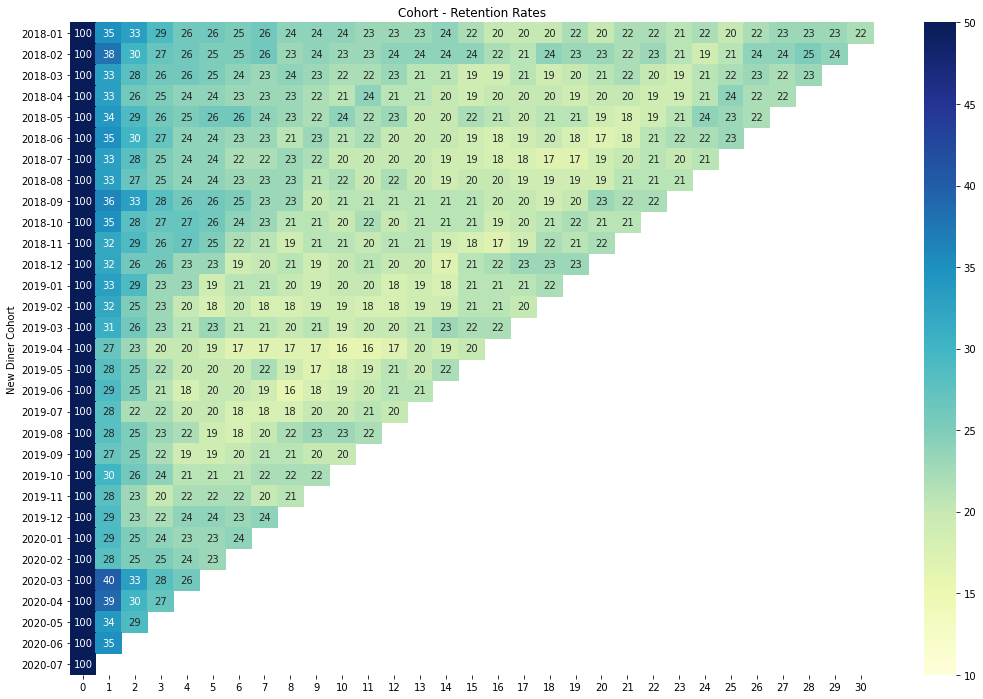

In [37]:
# Create a heatmap matrix visualization
plt.figure(figsize=(18,12))
plt.title('Cohort - Retention Rates')
sns.heatmap(data = retention, annot = True, fmt='g', vmin = 10, vmax = 50, cmap = 'YlGnBu')

In [38]:
# Average retention rate of the second month
retention['1'].mean()

32.13333333333333

In the above figure, we can see that there is a steep drop in diner engagement in the second month (index 1 along the x-axis) following the initial transaction. On average, about 68% of diners do not make any additional transactions in the second month. Higher levels of retention (above the 32% average) start in the 2018-01 cohort at 35% and continue until the 2019-03 cohort, where retention rates begin to drop for nearly a full year. We can see that 2018 was a strong year for retention, comparatively. Strong marketing campaigns, enticing promotions, or new product features could all be possible contributing factors for this trend. Moving horizontally across the matrix, we also see that diners in the 2018 cohorts were more dedicated in subsequent months, in comparison to those in the 2019 cohorts. Although retention does decline for all cohorts over time, diners using the competitor platform still sustain engagement, with no cohorts dropping below 16%.

We can see that lower rates of retention for 2019 begin in the 2019-03 cohort. This may be explained by seasonality in dining patterns. The month of March typically marks the beginning of the Spring season, with warmer weather in much of the United States attracting diners to dine in-person at restaurants, as opposed to cold Winter months where diners may be more inclined to order delivery. However, we do not see much of an improvement in retention for the remainder of the 2019 cohorts. The competitor may have failed to deliver on the strategies that were successful in the year prior.

Interestingly, the 2020-03 cohort experienced diner retention at 40% in the second month, the highest amongst all other cohorts. With the COVID-19 pandemic in full effect across the world, regions of the United States issued stay-at-home orders beginning in March 2020. With diners unable to dine in-person, reliance on food ordering and delivery platforms grew quickly. The 2020-04, 2020-05, and 2020-06 cohorts also experienced high rates of retention as the pandemic continued.

## Time Series Line Graph

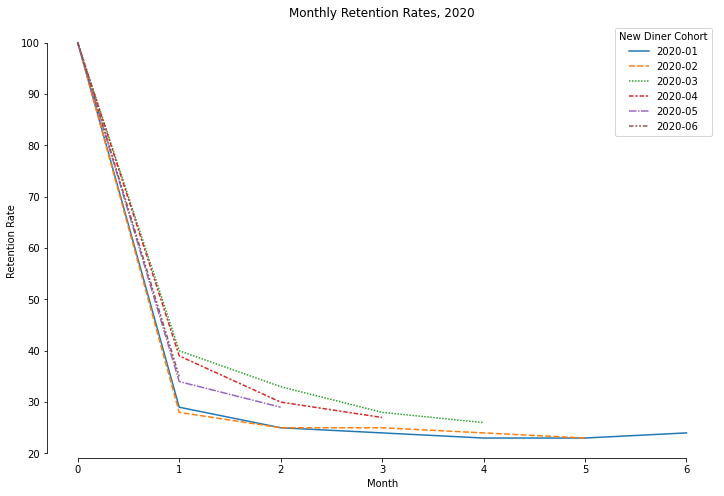

In [39]:
# Create a line graph visualization
plt.figure(figsize=(12,8))
plt.title('Monthly Retention Rates, 2020')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
cohorts_2020 = retention.loc[['2020-01','2020-02', '2020-03', '2020-04', '2020-05', '2020-06']].T
sns.lineplot(data=cohorts_2020)
sns.despine(trim=True)

We can also visualize the monthly retention rates for cohorts using a time series line graph. The above figure shows monthly retention rates for 2020 cohorts. The decrease in retention after the first month is more pronounced using this visualization. The change in retention due to the COVID-19 pandemic can be see in the difference between 2020-01 and 2020-02 cohorts (blue and orange lines) and the remaining cohorts.

Additionally, possessing information about the following may assist in validating the data:

* Competitor marketing campaigns
* Changes to competitor products and services
* Competitor finances and press releases
* Diner sentiment via social media platforms

# Conclusion

Cohort analysis can provide valuable insight into customer behavior and interaction with a product over time. Although theories can be made about the visible trends in the data, additional information from both competitors and customers would assist in supporting our claims and further shape our own business strategy.